## Modèles à base d'équations différentielles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

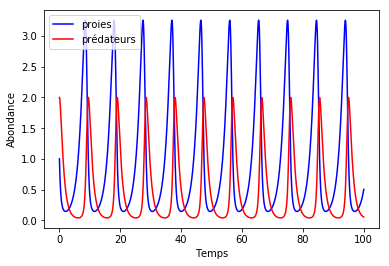

In [2]:
# The classical prey predator model

def model(C,t):
    prey=C[0]
    predator=C[1]
    dprey = prey*((2/3)-(4/3)*predator)
    dpredator = predator*(1*prey-1)
    return [dprey,dpredator]

t = np.linspace(0,100,100000)
ds = odeint(model,[1,2],t)

X=ds[:,0]
Y=ds[:,1]

%matplotlib inline
plt.figure(1)
plt.plot(t,X,'b-',t,Y,'r')
plt.xlabel('Temps')
plt.ylabel('Abondance')
plt.legend(['proies','prédateurs'])
plt.show()

In [3]:
# Question 1 : tracer le plan de phase courbe (X(t),Y(t)) et déterminer l'équilibre du système

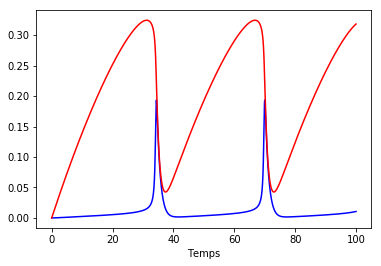

In [4]:
# Question : tracer les courbes des espèces du modèle BIOMD0000000006 - Tyson1991 - Cell Cycle 2 var




def model(C,t):
    u=C[0]
    v=C[1]
    kappa = 0.015
    k6 = 1.0
    k4 = 180.0
    k4prime = 0.018
    alpha = k4prime/k4
    du = k4*(v-u)*(alpha+u*u)-k6*u
    dv = kappa-k6*u
    return [du,dv]

t = np.linspace(0,100,100000)
ds = odeint(model,[0,0],t)

X=ds[:,0]
Y=ds[:,1]

%matplotlib inline
plt.figure(1)
plt.plot(t,X,'b-',t,Y,'r')
plt.xlabel('Temps')
plt.show()

# Simulation Stochastique

Installer StochPy, une bibliothèque de simulation stochastique

pip install stochpy



In [5]:
import stochpy

ModuleNotFoundError: No module named 'stochpy'

In [6]:
model = stochpy.SSA()
model.Model("Burstmodel.psc")
model.DoStochSim()
model.PlotSpeciesTimeSeries()

NameError: name 'stochpy' is not defined

In [7]:
# Enregistrer le modèle suivant dans StochPy/pscmodels/test.psc

"""
# Reactions
R1:
    A > B + byp
    k1*A

R2:
    B > A + byp2
    k2*B

#InitPar
k1 = 0.5
k2 = 0.5

#InitVar
A = 10000
B = 10000
byp = 0
byp2 = 0
"""

# Dessiner ce modèle et le comprendre. Puis le simuler en utilisant StochPy

model = stochpy.SSA()
model.Model("testkrebs.psc")
model.DoStochSim(trajectories=1, end=10000)
model.PlotSpeciesTimeSeries()

#model.PlotAverageSpeciesTimeSeries(species2plot = ["A","B"])


# Coder un plus grand modèle



NameError: name 'stochpy' is not defined

# Modèles booléens

Reprendre l'exemple de PBN donné en cours et le simuler dans les modes synchrone, puis asynchrone

In [8]:
def PBN(X):
    x1 = X[0]
    x2 = X[1]
    x3 = X[2]
    
    nb=np.random.rand()
    if (nb<0.3):
        y1 = (x1 and x2) or (not(x2) and not(x3))
    else:
        y1 = (not(x1) and x2) or x3
    y2 = (x1 and x3) or (not(x1) and x2)
    y3 = (x1 and not(x2)) or not(x3)
    return [y1,y2,y3]

X = [True,True,False]
for i in range(20):
    print(X)
    X=PBN(X)

# Question : Construire le graphe de transition (utiliser networkx)


# Question : trouver les cycles

[True, True, False]
[True, False, True]
[False, True, True]
[True, True, False]
[True, False, True]
[False, True, True]
[False, True, False]
[False, True, True]
[False, True, False]
[False, True, True]
[True, True, False]
[False, False, True]
[True, False, False]
[False, False, True]
[False, False, False]
[False, False, True]
[False, False, False]
[False, False, True]
[False, False, False]
[False, False, True]


In [9]:
import networkx as nx

G = nx.DiGraph()

In [10]:
def formate(X):
    res=""
    if (X[0] == True):
        res=res+"1"
    else:
        res=res+"0"
    if (X[1] == True):
        res=res+"1"
    else:
        res=res+"0"
    if (X[2] == True):
        res=res+"1"
    else:
        res=res+"0"
    return res


In [11]:
comptes = dict()

for x1 in [True,False]:
    for x2 in [True,False]:
        for x3 in [True,False]:
            X=[x1,x2,x3]
            for i in range(100):
                debut = formate(X)
                fin = formate(PBN(X))
                if G.has_edge(debut,fin):
                    comptes[debut+fin] += 1
                else:
                    G.add_edge(debut,fin)
                    comptes[debut+fin] = 1
                    

In [12]:
print(G.edges())
print(comptes)

[('111', '110'), ('110', '001'), ('110', '101'), ('001', '000'), ('001', '100'), ('101', '111'), ('101', '011'), ('011', '110'), ('011', '010'), ('100', '101'), ('100', '001'), ('010', '011'), ('010', '111'), ('000', '001'), ('000', '101')]
{'111110': 100, '110001': 63, '110101': 37, '101111': 73, '101011': 27, '100101': 18, '100001': 82, '011110': 71, '011010': 29, '010011': 29, '010111': 71, '001000': 31, '001100': 69, '000001': 70, '000101': 30}


Question : Etude de l'article https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4567168/

# Réseaux bayésiens

Voir le tutoriel de pgmpy

pip install pgmpy

In [13]:
np.random.rand()

0.3016634403963745